## GROUP PROJECT L 

## BOTNET - DETECTION USING DATASCIENCE TECHNIQUES

 # WHAT IS BOTNET 

A botnet is a number of Internet-connected devices, each of which is running one or more bots.
Botnets can be used to perform Distributed Denial-of-Service attacks, steal data, send spam,
and allows the attacker to access the device and its connection.

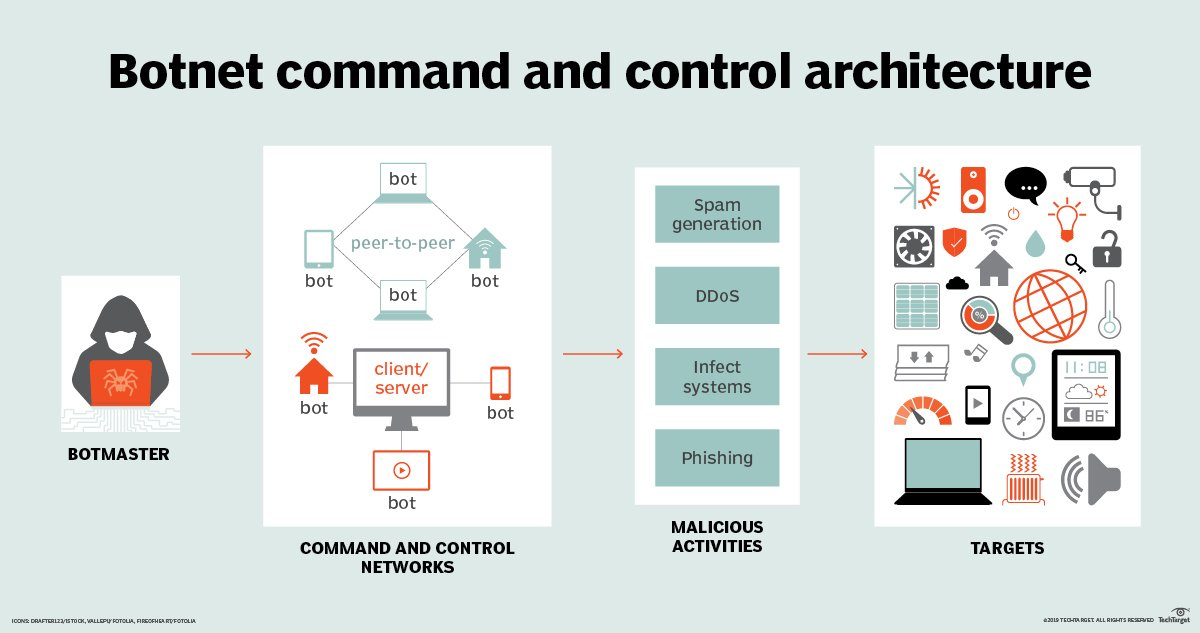

In [1]:
from IPython.display import Image
Image(filename='Botnet2.png',width = "1200",height = "1200")

In [4]:
from IPython.display import Image
Image(filename='Botnet1.png',width = "1200",height = "1200")

FileNotFoundError: [Errno 2] No such file or directory: 'Botnet1.png'

## What is zeus botnet

Zeus, ZeuS, or Zbot is a Trojan horse malware package that runs on versions of Microsoft Windows. 
While it can be used to carry out many malicious and criminal tasks, 
it is often used to steal banking information by man-in-the-browser keystroke logging and form grabbing.
It is also used to install the CryptoLocker ransomware.[1] Zeus is spread mainly through drive-by downloads and phishing
schemes. First identified in July 2007 when it was used to steal information from the United States Department of
Transportation,[2] it became more widespread in March 2009. In June 2009 security company Prevx discovered that Zeus had compromised over 74,000 FTP accounts on websites of such companies as the Bank of America, NASA, Monster.com, ABC, Oracle, Play.com, Cisco, Amazon, and BusinessWeek.[3] Similarly to Koobface, Zeus has also been used to trick victims of technical support scams into giving the scam artists money through pop-up messages that claim the user has a virus, when in reality they might have no viruses at all. The scammers may
use programs such as Command prompt or Event viewer to make the user believe that their computer is infected.[4]

# BOTNET DETECTION

In [ ]:
#Importing libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_ind
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Dataset Link
We have taken the dataset from the mentioned link: https://www.aksingh.net/zeus-tracker-data-archived/

# Loading Botnet Flow Statistics

In [ ]:
columns = np.arange(0,44) # read the 43 columns
names = ["srcip", "srcport", "dstip", "dstport", "proto",
         "total_fpackets", "total_fvolume", "total_bpackets", "total_bvolume", "min_fpktl",
         "mean_fpktl", "max_fpktl", "std_fpktl", "min_bpktl", "mean_bpktl",
         "max_bpktl", "std_bkptl", "min_fiat", "mean_fiat", "max_fiat",
         "std_fiat", "min_biat", "mean_biat", "max_biat", "std_biat",
         "duration", "min_active", "mean_active", "max_active", "std_active",
         "min_idle", "mean_idle", "max_idle", "std_idle", "sflow_fpackets",
         "sflow_fbytes", "sflow_bpackets", "sflow_bbytes", "fpsh_cnt", "bpsh_cnt",
         "furg_cnt", "burg_cnt", "total_fhlen", "total_bhlen"]
zeus_filename = "all_zeus.csv" # declare filenames
normal_filename = "all_normal.csv" #  declare file names
df_zeus = pd.read_csv(zeus_filename, usecols=columns, names=names) # read files as data frame
df_zeus['is_botnet'] = 1 #  all examples in zeus file are botnets
print(len(df_zeus)) # 
df_zeus.head() #  first 5 columns

# Loading Normal Flow Statistics

In [ ]:
normal_df = pd.read_csv(normal_filename, usecols=columns, names=names)
normal_df['is_botnet'] = 0
print(len(normal_df))
df_normal = normal_df.iloc[:len(df_zeus), :]
print(len(df_normal))
df_normal.head(10) #  exactly same thing but not botnet we have 843 rows

# Combining All Data

In [ ]:
data = pd.concat([df_zeus, df_normal])
print(len(data))
data = data.sample(frac=1)
data.head()

# Dataset analysis

In [ ]:
data[data.isnull().any(axis=1)].head()

In [ ]:
np.sum(data.isnull().any(axis=1))

In [ ]:
data.isnull().any(axis=0)

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.head()

In [ ]:
y=data['is_botnet']
y.value_counts()

In [ ]:

sns.countplot(data= data, x = "is_botnet")
plt.show()

# HEATMAP

In [ ]:
plt.figure(figsize = (50,50))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

In [ ]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

## FEATURE SELECTION USING EMBEDDED METHOD
The reason we choose embedded method was because they are iterative in a sense that the model training process. Regularization techniques are more most commonly used in these techniques,lassoCV regularization is the basic of all the embedded methods.

In [ ]:
#Using the unbalanced data
data_all = pd.concat([df_zeus, normal_df])
data_all=data_all[['duration','max_active','max_biat','max_bpktl','max_fiat','mean_bpktl','mean_fpktl','min_active','min_bpktl','min_fpktl','std_active','std_bkptl','is_botnet']]
data_all.shape
X=data_all.drop(columns=['is_botnet'])
y=data_all.is_botnet

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
_= plt.title("Feature importance using Lasso Model")

so now our major features are max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_fiat,
max_bpktl,max_fiat,max_bpktl,max_biat, **we will work on these feature** 

# Correlation between the features

In [ ]:
feature_coorelation=data_all[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl',
'max_bpktl','max_fiat','max_biat']]

In [ ]:
feature_coorelation.head()

In [ ]:
feature_corrmat = feature_coorelation.corr() 
feature_corrmat

In [ ]:
f, ax = plt.subplots(figsize =(9, 8)) 
_ = sns.heatmap(feature_corrmat, ax = ax, linewidths = 0.2) 

Paiplot is used to visualize the correlation diagonals are histogram it means variables are related to each and correlation
are scatterplot, it give the realtionship between other variables

In [ ]:
plt.figure(figsize=(30,25))
sns.pairplot(feature_coorelation[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl','max_fiat',
'max_bpktl']])
plt.show()

In [ ]:
new_df=pd.DataFrame(data_all[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl','max_fiat',
'max_bpktl','is_botnet']])

#### Preparing data to apply SMOTE technique

In [ ]:
X=new_df.drop(columns=['is_botnet'])
y=new_df.is_botnet

#Splitting the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

In [ ]:
# SMOTE technique on train
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [ ]:
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_smote))

In [ ]:
X_test_smote, y_test_smote = smote.fit_sample(X_test, y_test)

In [ ]:
print("Before SMOTE : ", Counter(y_test))
print("After SMOTE : ", Counter(y_test_smote))

# BernoulliNB Training

In [ ]:
# checking all 45 column names in the dataset
print(df_zeus.columns)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(feature_coorelation, Class_label, test_size=0.25, random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
Br=BernoulliNB()
Br= Br.fit(X_train , y_train)
Br

In [ ]:
y_pred1 = Br.predict(X_test)
#print('Accuracy score= {:.2f}'.format(Br.score(y_pred1, y_test)))

In [3]:
ytest_accscore=accuracy_score(y_test,y_pred1);
print(ytest_accscore)

NameError: name 'accuracy_score' is not defined

# BernoulliNB Testing Precision, Recall, F1

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred1))
print('\n')

# Decision Tree Testing data ROC CURVE

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()

# Decision Tree

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
botnet_data = imputer.fit_transform(data_all)

pd.DataFrame(data=botnet_data, columns=data_all.columns).head()

In [ ]:

enc_X = OrdinalEncoder()
enc_y = LabelEncoder()

In [ ]:
X=enc_X.fit_transform(new_df.drop(columns=['is_botnet']))
y=enc_y.fit_transform(new_df.is_botnet)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.25, random_state=100)
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

In [ ]:

clf=DecisionTreeClassifier(random_state=142,max_depth=5)
clf.fit(X_train1 , y_train1)

In [ ]:
# Visualize the tree structure
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, max_depth=4, filled=True, fontsize=10, 
               feature_names=data_all.columns[1:], class_names=enc_y.classes_.astype(str))
plt.show()

In [ ]:
# For each criterion, we use 10-fold cross validation to report the testing accuracy.
cv_scores = []
cv_scores_std = []
splitting_criteria = ['gini', 'entropy']
for i in splitting_criteria:
    clf_dtc = DecisionTreeClassifier(criterion=i, random_state=42)
    scores = cross_val_score(clf_dtc, X, y, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

In [ ]:
plt.bar(splitting_criteria, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Criterion')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
y_dec_tree1 = clf.predict(X_test1)

In [ ]:
ytest_accscore=accuracy_score(y_test1,y_dec_tree1);
print('Accuracy Score of decision tree ',ytest_accscore)

# Decision Tree Testing - Precision, Recall, F1

In [ ]:
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test1, y_dec_tree1)
print(CR)

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test1,y_dec_tree1))
print('\n')

### KNN Classifier

In [ ]:
# Create and training a KNN classifier model with neighbors 20
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy for 20 neighbors is: ', accuracy)
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))

In [ ]:
# Create and training a KNN classifier model with neighbors 3
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = knn1.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy 3 neighbors is: ', accuracy)
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))

In [ ]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    k = KNeighborsClassifier(n_neighbors = i)
    k.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(k.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(k.predict(X_test), y_test))

plt.rcParams['figure.figsize'] = (10 , 8)
# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [ ]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 55)}

# Create the machine learning model
knn3 = KNeighborsClassifier()
knn3_clf = GridSearchCV(knn3, parameter_grid, scoring='accuracy', cv=10)
knn3_clf.fit(X_train, y_train)

# Identify the best parameter(s)
print('Best K value: ', knn3_clf.best_params_['n_neighbors'])
print('The accuracy: ', knn3_clf.best_score_)

Both the training and testing error increases as the neighbors increase. Error gets introduced as the values of neighbors increase. The model is more stable when there are 3 neighbors.

# NEURAL_NETWORK : Multi-layer Perceptron (MLP) 

In [ ]:
abc = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

abc.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
# Use the model to predict testing data
y_pred = abc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy neural network  is: ', accuracy)

In [ ]:
abc.fit(X_test_smote, y_test_smote)
y_predict = abc.predict(X_train)
print(accuracy_score(y_train, y_predict))

## neural_network precission and recall 

In [ ]:
print("Precision, Recall, F1 BEFORE SMOTE ")
print('\n')
CR=classification_report(y_test1, y_pred)
print(CR)


In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test1,y_pred))
print('\n')

In [ ]:
xyz, oop, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(xyz, oop)


plt.figure()

plt.plot(xyz, oop, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()

#### Comparing results of Decision tree with BernoulliNB using t-test

In [ ]:
scores_bnb = cross_val_score(Br, X, y, cv=10)
print('Accuracy range for BernoulliNB classifier: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_bnb.min(), scores_bnb.max(), scores_bnb.mean(), scores_bnb.std()))

scores_dtree = cross_val_score(clf, X, y, cv=10)
print('Accuracy range for Decision Tree: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_dtree.min(), scores_dtree.max(), scores_dtree.mean(), scores_dtree.std()))

scores_knn = cross_val_score(knn1, X, y, cv=10)
print('Accuracy range for Knn with best neighbor: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_knn.min(), scores_knn.max(), scores_knn.mean(), scores_knn.std()))

scores_nn = cross_val_score(abc, X, y, cv=10)
print('Accuracy range for multi layer percepton classifier: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_nn.min(), scores_nn.max(), scores_nn.mean(), scores_nn.std()))

When we look at the accuracy range for the four models is best for Knn algorithm and could be considered in our approach. 

In [ ]:
t, p = ttest_ind(scores_knn, scores_bnb)
print ('t, p: %.4f, %.6f\n' % (t, p))

t1, p1 = ttest_ind(scores_knn, scores_dtree)
print ('t1, p1: %.4f, %.6f\n' % (t1, p1))

t3, p3 = ttest_ind(scores_knn, scores_nn)
print ('t3, p3: %.4f, %.6f\n' % (t3, p3))

When we look t-test scores considering the significance level as 0.05 it is evident that KNN has better probability of detecting a botnet as compared to BernoulliNB and neural network. It can be considered the probability of Knn and Decision Tree will be similar i.e. their performance.

## COMPARISION OF RESULTS 

In [ ]:
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Accuracy"]

x.add_row(["DecisionTreeClassifier", 0.985])
x.add_row(["BernoulliNB", 0.80])
x.add_row(["Neural network : multi layer percepton classifier before smote ", 0.593])
x.add_row(["Neural network : multi layer percepton classifier after smote ", 0.624])
x.add_row(["k nearest neighbours ", 0.932])
print(x)
print('\n')

In [ ]:
x = PrettyTable()
print('\n')
print("Best Models.")
x.field_names = ["Models", "Accuracy"]
x.add_row(["DecisionTreeClassifier", 0.985])
x.add_row(["BernoulliNB", 0.80])
x.add_row(["k nearest neighbours ", 0.932])
print(x)
print('\n')

In [ ]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Accuracy"]
x.add_row(["DecisionTreeClassifier",0.985])
print(x)
print('\n')

In [ ]:
Class_label=new_df.is_botnet
Features_train=new_df.drop(columns=['is_botnet'])

In [ ]:
Features_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Ran_For= DecisionTreeClassifier(max_depth=15, random_state=11,max_leaf_nodes=10)
Ran_For= Ran_For.fit(Features_train , Class_label)
Ran_For

# By entering the data of '0' is_botnet for prediction

In [ ]:
new_data=pd.read_csv('prediction.csv')
new_data

## Running prediction module 

In [ ]:
pred=Ran_For.predict(new_data)
if pred==1:
    print("This is not a botnet")
else:
    print("This is a botnet")